<h2> Quantify Network and Engagement OVerlap </h2>

This code snippet includes utility functions to load and filter JSON data, as well as functions to calculate network overlap and engagement overlap between influencers. It also performs data loading and filtering using the provided JSON files. These functions are essential for processing and analyzing the data efficiently in subsequent steps.






In [15]:
import json
import datetime

def load_json_data(file_path):
    # Load JSON data from the given file path
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def filter_following_data(data):
    # Filter the following data based on the follow timestamp
    cutoff_date = datetime.datetime(2022, 4, 30)
    filtered_data = [entry for entry in data if datetime.datetime.strptime(entry['follow_timestamp'], "%Y-%m-%d %H:%M:%S %Z") <= cutoff_date]
    return filtered_data

def filter_engagement_data(data):
    # Filter the engagement data based on the engaged date
    cutoff_start_date = datetime.datetime(2022, 4, 22)
    cutoff_end_date = datetime.datetime(2022, 4, 30)
    filtered_data = [entry for entry in data if cutoff_start_date <= datetime.datetime.strptime(entry['engaged_dt'], "%Y-%m-%d") <= cutoff_end_date]
    return filtered_data

# Load following.json and engagement.json data
following_data = load_json_data('following.json')
engagement_data = load_json_data('engagement.json')

# Filter the datasets
filtered_following_data = filter_following_data(following_data)
filtered_engagement_data = filter_engagement_data(engagement_data)

# Define the functions for network overlap and engagement overlap calculations
def calculate_network_overlap(influencer_id1, influencer_id2, following_data):
    # Calculate the network overlap between two influencers
    followers_influencer1 = set()
    followers_influencer2 = set()

    for entry in following_data:
        follower_uid = entry['follower_uid']
        influencer_uid = entry['influencer_uid']

        if influencer_uid == influencer_id1:
            followers_influencer1.add(follower_uid)
        elif influencer_uid == influencer_id2:
            followers_influencer2.add(follower_uid)

    shared_followers = followers_influencer1.intersection(followers_influencer2)
    total_followers_less_followed = min(len(followers_influencer1), len(followers_influencer2))

    network_overlap = len(shared_followers) / total_followers_less_followed
    return network_overlap

def calculate_engagement_overlap(influencer_id1, influencer_id2, engagement_data):
    # Calculate the engagement overlap between two influencers
    engagers_influencer1 = set()
    engagers_influencer2 = set()

    for entry in engagement_data:
        influencer_uid = entry['influencer_uid']
        follower_uid = entry['follower_uid']

        if influencer_uid == influencer_id1:
            engagers_influencer1.add(follower_uid)
        elif influencer_uid == influencer_id2:
            engagers_influencer2.add(follower_uid)

    shared_engagers = engagers_influencer1.intersection(engagers_influencer2)
    total_engagers_less_engaged = min(len(engagers_influencer1), len(engagers_influencer2))

    engagement_overlap = len(shared_engagers) / total_engagers_less_engaged
    return engagement_overlap

The code snippet below calculates the network and engagement overlaps for all pairs of influencers. For the network overlap calculation, the function *calculate_network_overlap_all_pairs* iterates over the filtered following data to identify the followers of each influencer. It then calculates the overlap between the followers of every pair of influencers. Similarly, for the engagement overlap calculation, the function *calculate_engagement_overlap_all_pairs* iterates over the filtered engagement data to identify the engagers of each influencer. It then calculates the overlap between the engagers of every pair of influencers.

The resulting network overlaps and engagement overlaps are then visualized using histograms.

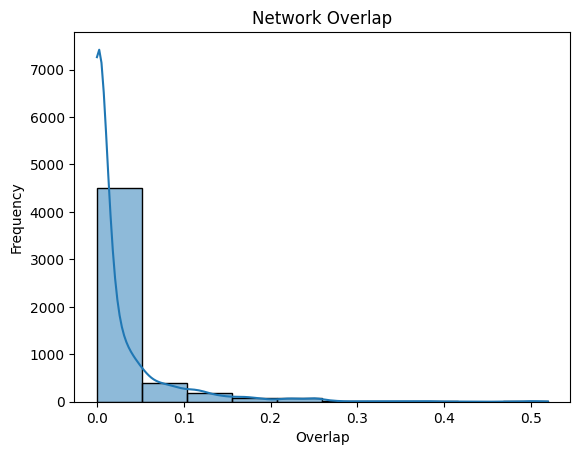

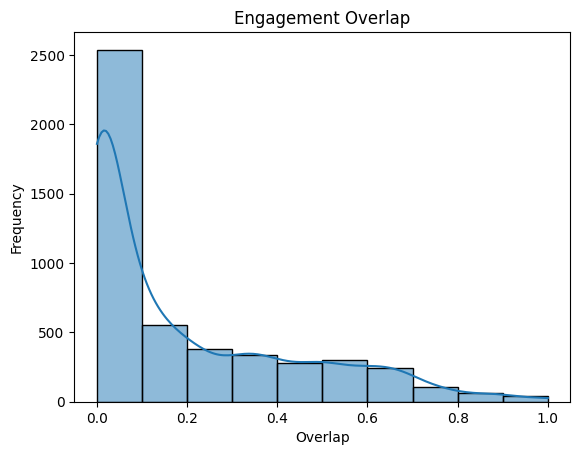

In [16]:
import seaborn as sns

def generate_histogram(data, title):
    # Generate a histogram using Seaborn
    sns.histplot(data, bins=10, kde=True)
    plt.title(title)
    plt.xlabel('Overlap')
    plt.ylabel('Frequency')
    plt.show()

def calculate_network_overlap_all_pairs(filtered_following_data):
    # Create a dictionary to store the followers of each influencer
    influencer_followers = {}

    for entry in filtered_following_data:
        influencer_id = entry['influencer_uid']
        follower_id = entry['follower_uid']

        if influencer_id in influencer_followers:
            # Add the follower to the set of followers for the influencer
            influencer_followers[influencer_id].add(follower_id)
        else:
            # Create a new set for the influencer's followers and add the follower
            influencer_followers[influencer_id] = {follower_id}

    network_overlaps = []

    # Iterate over the influencers and calculate network overlap for each pair
    for i, influencer_id1 in enumerate(influencer_followers):
        for influencer_id2 in list(influencer_followers.keys())[i + 1:]:
            followers_influencer1 = influencer_followers[influencer_id1]
            followers_influencer2 = influencer_followers[influencer_id2]

            # Find the followers common to both influencers
            shared_followers = followers_influencer1.intersection(followers_influencer2)
            total_followers_less_followed = min(len(followers_influencer1), len(followers_influencer2))

            # Calculate the network overlap between the influencers
            network_overlap = len(shared_followers) / total_followers_less_followed
            network_overlaps.append(network_overlap)

    return network_overlaps

def calculate_engagement_overlap_all_pairs(filtered_engagement_data):
    # Create a dictionary to store the engagers of each influencer
    influencer_engagers = {}

    for entry in filtered_engagement_data:
        influencer_id = entry['influencer_uid']
        engager_id = entry['follower_uid']

        if influencer_id in influencer_engagers:
            # Add the engager to the set of engagers for the influencer
            influencer_engagers[influencer_id].add(engager_id)
        else:
            # Create a new set for the influencer's engagers and add the engager
            influencer_engagers[influencer_id] = {engager_id}

    engagement_overlaps = []

    # Iterate over the influencers and calculate engagement overlap for each pair
    for i, influencer_id1 in enumerate(influencer_engagers):
        for influencer_id2 in list(influencer_engagers.keys())[i + 1:]:
            engagers_influencer1 = influencer_engagers[influencer_id1]
            engagers_influencer2 = influencer_engagers[influencer_id2]

            # Find the engagers common to both influencers
            shared_engagers = engagers_influencer1.intersection(engagers_influencer2)
            total_engagers_less_engaged = min(len(engagers_influencer1), len(engagers_influencer2))

            # Calculate the engagement overlap between the influencers
            engagement_overlap = len(shared_engagers) / total_engagers_less_engaged
            engagement_overlaps.append(engagement_overlap)

    return engagement_overlaps

# Calculate network overlap for all influencer pairs
network_overlaps = calculate_network_overlap_all_pairs(filtered_following_data)
# Generate histogram for network overlap
generate_histogram(network_overlaps, 'Network Overlap')

# Calculate engagement overlap for all influencer pairs
engagement_overlaps = calculate_engagement_overlap_all_pairs(filtered_engagement_data)
# Generate histogram for engagement overlap
generate_histogram(engagement_overlaps, 'Engagement Overlap')


Next, we use OLS to regress the engagement overlap on network overlap measures and plot the regression using standard error bands.

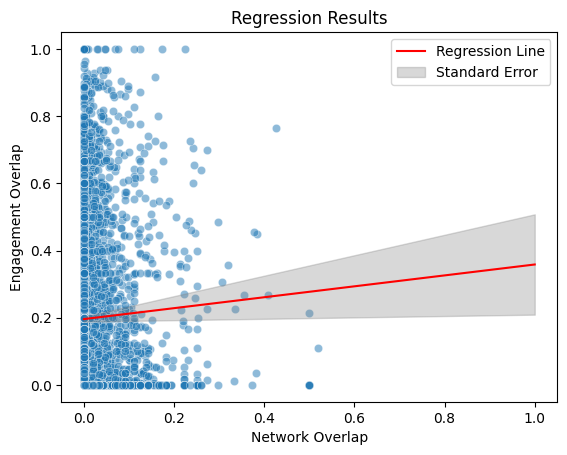

In [17]:
import statsmodels.api as sm
import numpy as np

def plot_regression_with_error_bands(x, y, results):
    # Generate x values for plotting
    x_plot = np.linspace(0, 1, 100)
    x_plot_const = sm.add_constant(x_plot)

    # Predict the y values using the regression model
    y_plot = results.predict(x_plot_const)

    # Calculate the standard error bands
    se = results.bse[0] + results.bse[1] * x_plot
    lower_band = y_plot - 1.96 * se
    upper_band = y_plot + 1.96 * se

    # Create a scatter plot of the data
    sns.scatterplot(x=x, y=y, alpha=0.5)

    # Plot the regression line and standard error bands
    plt.plot(x_plot, y_plot, color='red', label='Regression Line')
    plt.fill_between(x_plot, lower_band, upper_band, color='gray', alpha=0.3, label='Standard Error')

    # Set the plot labels and title
    plt.xlabel('Network Overlap')
    plt.ylabel('Engagement Overlap')
    plt.title('Regression Results')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

# Calculate network overlap for all influencer pairs
network_overlaps = calculate_network_overlap_all_pairs(filtered_following_data)

# Calculate engagement overlap for all influencer pairs
engagement_overlaps = calculate_engagement_overlap_all_pairs(filtered_engagement_data)

# Make sure network_overlaps and engagement_overlaps have the same length
min_length = min(len(network_overlaps), len(engagement_overlaps))
network_overlaps = network_overlaps[:min_length]
engagement_overlaps = engagement_overlaps[:min_length]

# Convert the overlap measures to numpy arrays
X = np.array(network_overlaps)
y = np.array(engagement_overlaps)

# Add a constant term to the network overlap array
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X)
results = model.fit()

# Plot the regression results with standard error bands
plot_regression_with_error_bands(X[:, 1], y, results)
